In [3]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

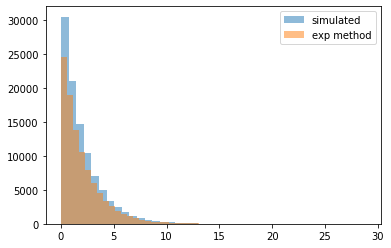

In [2]:
# generating exponential random variables

def inv_exp(u, lmda):
    return -(1/lmda)*math.log(1 - u)

exp_sim = []

for i in range(100000):
    num = random.random()
    exp_sim.append(inv_exp(num, 0.5))

exp_med = np.random.exponential(2, 100000) # 2 = 1 / lambda

plt.hist(exp_sim, 40, alpha=0.5, label='simulated')
plt.hist(exp_med, 40, alpha=0.5, label='exp method')
plt.legend(loc='upper right')
plt.show()

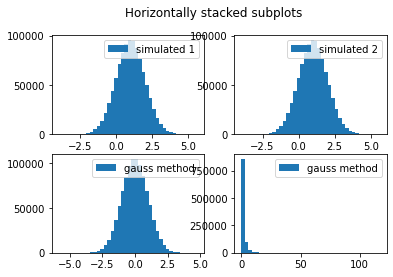

In [44]:
# generating raandom gaussian variables

def inv_gaus(u, v, m, sig):
    a = []
    a.append(sig*(math.sqrt(-2*math.log(u))*math.cos(2*math.pi*v)) + m )
    a.append(sig*(math.sqrt(-2*math.log(u))*math.sin(2*math.pi*v)) + m)
    return a

Z1 = []
Z2 = []

for i in range(1000000):
    u = random.random()
    v = random.random()
    temp = inv_gaus(u, v, 1,1)
    Z1.append(temp[0])
    Z2.append(temp[0])

# using gaussian method 
gaus_med = np.random.normal(0, 1, 1000000)

# log normal dist
log_gaus_med = np.exp(gaus_med)


fig, axs = plt.subplots(2, 2)
fig.suptitle('Horizontally stacked subplots')

axs[0,0].hist(Z1, bins = 40, label = 'simulated 1')
axs[0,0].legend(loc='upper right')
axs[0,1].hist(Z2, bins = 40, label = 'simulated 2')
axs[0,1].legend(loc='upper right')
axs[1,0].hist(gaus_med, bins = 40, label = 'gauss method')
axs[1,0].legend(loc='upper right')
axs[1,1].hist(log_gaus_med, bins = 40, label = 'gauss method')
axs[1,1].legend(loc='upper right')
plt.show()

(0.0, 20.0)

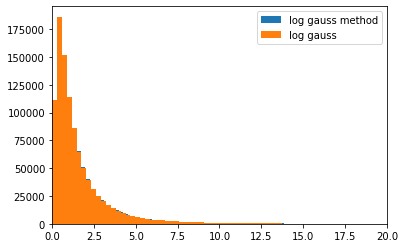

In [50]:
# log normal dist
s = np.random.lognormal(0, 1, 1000000)
plt.hist(s , bins = 400, label = 'log gauss method')
plt.legend(loc='upper right')
plt.hist(log_gaus_med , bins = 400, label = 'log gauss')
plt.legend(loc='upper right')
plt.xlim(0,20)

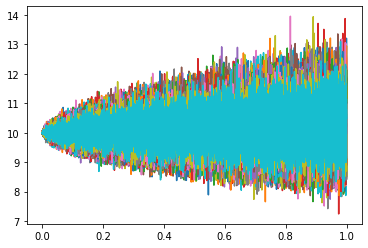

In [66]:
# generating paths of a stock 

for j in range(10):

    N = np.random.normal(0, 1, 10000)
    s_path = []
    s0 = 10
    r = 0.02
    sig = 0.07
    t = np.linspace(0,1,10000)

    for i in range(len(N)):
        s_path.append(s0*math.exp((r - 0.5*sig**2)*t[i] + sig*math.sqrt(t[i])*N[i]))

    plt.plot(t,s_path)
    
plt.show()

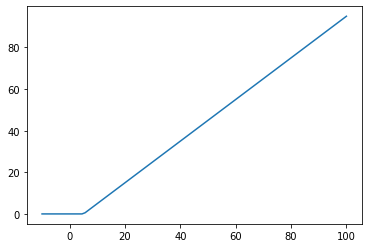

In [94]:
x = np.linspace(-10, 100, 100)
y = np.maximum(x - 5, 0)
plt.plot(x, y)
plt.show()

In [37]:
# call price function (using monte carlo) under black scholes

def call_price(s, r, sig, n, K, t, T):
    N = np.random.normal(0, 1, n)
    
    payoff = np.maximum(s*np.exp((r - 0.5*sig**2)*(T - t) + sig*math.sqrt(T - t)*N) - K, 0)*math.exp(-r*(T - t))
    
    #payoff = []
    
    #for i in range(len(N)):
        #payoff.append(max(s*math.exp((r - 0.5*sig**2)*(T - t) + sig*math.sqrt(T - t)*N[i]) - K, 0)*math.exp(-r*(T - t)))
    
    return np.mean(payoff)


In [38]:
# estimating the evolution of a call price wrt the stock initial level

s_path = np.linspace(0,100,1000)
K = 40
sig = 0.5
r = 0.12
t = 0
T = 0.75
n = 100000000
call_path = []

for s in s_path:
    call_path.append(call_price(s, r, sig, n, K, t, T))

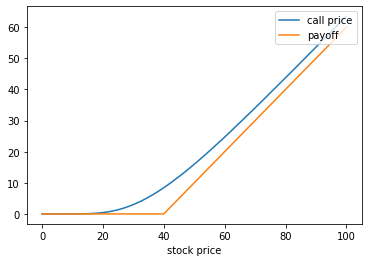

In [39]:
plt.plot(s_path, call_path, label = 'call price')

x = np.linspace(0, 100, 1000)
y = np.maximum(x - K, 0)
plt.plot(x, y, label = 'payoff')
plt.xlabel('stock price')
plt.legend(loc='upper right')
plt.show()

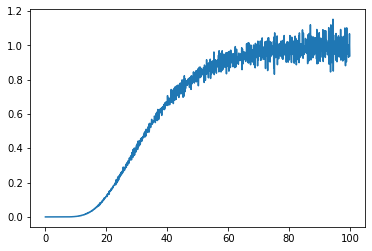

In [40]:
dS = - s_path[0:-2] + s_path[1:-1]
dC = - np.array(call_path[0:-2]) + np.array(call_path[1:-1])
der = np.divide(dC,dS)
plt.plot(s_path[1:-1], der)

In [41]:
# Algo zéro d'une fonction
# dicotomie

In [64]:
def cur(x):
    res = 32*x**3 + 78*x**2 + 4*x + 9
    return res

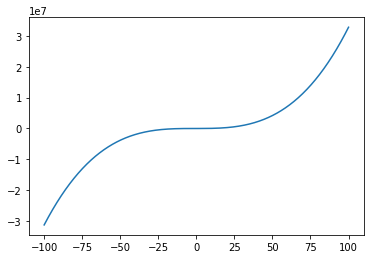

In [62]:
w = np.linspace(-100, 100, 1000)

y =  32*np.power(w,3) + 78*np.power(w,2) + 4*w + 9

plt.plot(w,y)
plt.show()

In [90]:
a = -100
b = 100
c = 100

while abs(cur(c))>0.00001:
    c = (a+b)/2
    
    if(cur(c)*cur(a) < 0):
        b = c
    else:
        a = c


In [91]:
print(c)
print(cur(c))

-2.433624491095543
-8.024057024158537e-06


In [92]:
# methode de Newton

x_1 = 100

while abs(cur(x_1)) > 0.00001:
    dif = (cur(x_1)-cur(x_1 - 0.0000001))/0.0000001 # dirivation of the function
    x_2 = x_1 - cur(x_1)/dif # newton step 
    x_1 = x_2


In [93]:
print(x_1)
print(cur(x_1))

-2.4336244726870513
-4.4727408727851525e-06


In [94]:
# finding the local maximum of a function

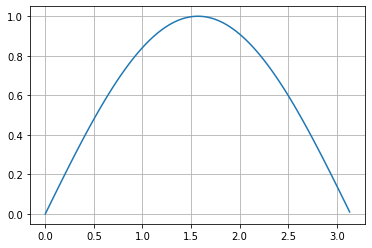

In [100]:
x = np.linspace(0,math.pi - 0.01, 100)
plt.plot(x,np.sin(x))
plt.grid()
plt.show()

In [105]:
# algorithm

x0 = 0
x2 = math.pi

def find_max(x, y, delta):
    z = (x+y)/2

    if(math.sin((x+z)/2) >= math.sin((y+z)/2)):
        y = z
        if(abs(math.sin(y) - math.sin(x)) < delta):
            return y
        else:
            return find_max(x,y,delta)
    else:
        x = z
        if(abs(math.sin(y) - math.sin(x)) < delta):
            return x
        else:
            return find_max(x,y,delta)

In [112]:
find_max(0,math.pi,0.0000000000000000000001) # maximum at math.pi/2

1.57079631655447

In [289]:
# calculating the inverse of a matrix

def inverse_mat(mat):
    
    inv_mat = np.identity(len(mat))
    
    for i in [0,1,2]:
        for j in range(len(mat)):
            if(i != j):
                inv_mat[j] = inv_mat[j] - inv_mat[i]*(mat[j][i]/mat[i][i])
                mat[j] = mat[j] - mat[i]*(mat[j][i]/mat[i][i])
    for i in range(len(mat)):
        inv_mat[i] = inv_mat[i]/mat[i][i]
        
    return inv_mat
                
            

In [290]:
mat = np.array([[1.,2.,3.],[1.,5.,7.], [5.,3.,8.]])
print(mat)

res = inverse_mat(mat)
print(res)

[[1. 2. 3.]
 [1. 5. 7.]
 [5. 3. 8.]]
[[ 2.71428571 -1.         -0.14285714]
 [ 3.85714286 -1.         -0.57142857]
 [-3.14285714  1.          0.42857143]]


In [291]:
mat = np.array([[1.,2.,3.],[1.,5.,7.], [5.,3.,8.]])
print(np.matmul(mat,res))
print(np.matmul(res,mat))

[[ 1.00000000e+00  2.22044605e-16 -5.55111512e-17]
 [-3.55271368e-15  1.00000000e+00 -5.55111512e-17]
 [ 0.00000000e+00 -8.88178420e-16  1.00000000e+00]]
[[ 1.00000000e+00  1.94289029e-16 -6.66133815e-16]
 [-1.11022302e-16  1.00000000e+00  0.00000000e+00]
 [-1.66533454e-16 -4.99600361e-16  1.00000000e+00]]


In [368]:
# numerical methods for integrals

def f(x):
    #return x**3 + 3*x**2 + 4
    return math.sin(x)


def integral_trapeze(a,b,n):
    x = np.linspace(a,b,n)
    res = 0
    for i in range(2,len(x)-1):
        res += f(x[i])*(b-a)/n
    res += 0.5*(f(x[1]) + f(x[len(x)-1]))*(b-a)/n
    return res

def integral_rectangle(a,b,n):
    x = np.linspace(a,b,n)
    res = 0
    for i in range(1,len(x)):
        res += f(x[i])*(b-a)/n
    return res

def integral_simp(a,b,n):
    x = np.linspace(a,b,n)
    res = 0
    for i in range(2,len(x)-1):
        if(i%2 == 0):
            res += 2*f(x[i])*(b-a)/n
        else:
            res += 4*f(x[i])*(b-a)/n
            
    res += f(x[1]) + f(x[len(x)-1])
    res = res/3
    
    return res

In [370]:
integral_trapeze(0,math.pi,100000)

1.9999799993420226

In [371]:
integral_rectangle(0,math.pi,100000)

1.9999799998355077

In [372]:
integral_simp(0,math.pi,100000)

1.9999904705997882

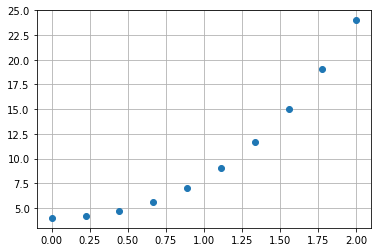

In [339]:
x = np.linspace(0,2,10)
plt.plot(x,f(x), 'o')
plt.grid()
plt.show()

In [353]:
# using the expectation approach

x = np.random.uniform(0,math.pi,1000000)
#y = np.power(x,3) + 3*np.power(x,2) + 4
y = np.sin(x)
print(np.mean(y)*(math.pi-0))

1.9991580262525035


In [384]:
import quandl

quandl.ApiConfig.api_key = "McTKPtSBmkNLFSyv___y"

In [409]:
#data = quandl.get_table('MER/F1', compnumber="39102", paginate=True)
# ,qopts = { 'columns': ['coupon', 'maturity', 'currency'] }
#data = quandl.get_table('WIKI/PRICES', qopts = { 'columns': ['ticker', 'date', 'close'] }, ticker = ['AAPL', 'MSFT'], date = { 'gte': '2016-01-01', 'lte': '2016-12-31' })

#data = quandl.get_table('CHORD7/BD', paginate=True)
#data = quandl.get("FED/RXI_N_A_VE", authtoken="McTKPtSBmkNLFSyv___y")
data = quandl.get("RBA/F17_0", authtoken="McTKPtSBmkNLFSyv___y")

In [411]:
data.columns

Index(['Zero-coupon yield – 0 yrs. Units: Per cent per annum; Series ID: FZCY0D',
       'Zero-coupon yield – 0.25 yrs. Units: Per cent per annum; Series ID: FZCY25D',
       'Zero-coupon yield – 0.5 yrs. Units: Per cent per annum; Series ID: FZCY50D',
       'Zero-coupon yield – 0.75 yrs. Units: Per cent per annum; Series ID: FZCY75D',
       'Zero-coupon yield – 1 yr. Units: Per cent per annum; Series ID: FZCY100D',
       'Zero-coupon yield – 1.25 yrs. Units: Per cent per annum; Series ID: FZCY125D',
       'Zero-coupon yield – 1.5 yrs. Units: Per cent per annum; Series ID: FZCY150D',
       'Zero-coupon yield – 1.75 yrs. Units: Per cent per annum; Series ID: FZCY175D',
       'Zero-coupon yield – 2 yrs. Units: Per cent per annum; Series ID: FZCY200D',
       'Zero-coupon yield – 2.25 yrs. Units: Per cent per annum; Series ID: FZCY225D',
       'Zero-coupon yield – 2.5 yrs. Units: Per cent per annum; Series ID: FZCY250D',
       'Zero-coupon yield – 2.75 yrs. Units: Per cent per ann

In [413]:
dt = quandl.get("BUNDESBANK/BBK01_WX0076", authtoken="McTKPtSBmkNLFSyv___y")

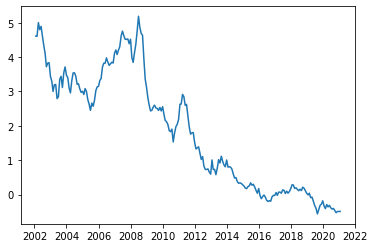

In [422]:
plt.plot(dt)

In [448]:
def duration(n,c,y,N):
    res1 = 0
    res2 = 0
    for i in range(n):
        res1 += c*i*N/((1+y)**i)
        res2 += c*N/((1+y)**i)
    res1 += N*n/((1+y)**n)
    res2 += N/((1+y)**n)
    
    return res1/res2

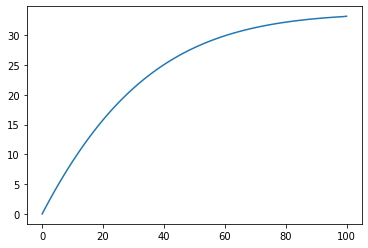

In [453]:
g = np.linspace(0,100,100)
h = []
for gg in g:
    h.append(duration(int(gg),0.02,0.03,100))
    
plt.plot(g,h)